# Worksheet 16

Name: Daniyal Ahmed  
UID: U11469883

### Topics

- Support Vector Machines (Non-linear case)

## Support Vector Machines

Follow along in class to implement the perceptron algorithm and create an animation of the algorithm.

a) As we saw in class, the form
$$w^T x + b = 0$$
while simple, does not expose the inner product `<x_i, x_j>` which we know `w` depends on, having done the math. This is critical to applying the "kernel trick" which allows for learning non-linear decision boundaries. Let's modify the above algorithm to use the form
$$\sum_i \alpha_i <x_i, x> + b = 0$$

In [41]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

TEMPFILE = "temp.png"
CENTERS = [[0, 1], [1, 0]]

epochs = 100
learning_rate = .05
expanding_rate = .99
retracting_rate = 1.1

X, labels = datasets.make_blobs(n_samples=10, centers=CENTERS, cluster_std=0.2, random_state=0)
Y = np.array(list(map(lambda x : -1 if x == 0 else 1, labels.tolist())))

alpha_i = np.zeros((len(X),))
b = 0.1

def snap(x, alpha_i, b, error):
    # create a mesh to plot in
    h = .01  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    meshData = np.c_[xx.ravel(), yy.ravel()]
    cs = np.array([x for x in 'gb'])

    svm = np.array([predict(alpha_i, b, x) for x in X])

    #w
#    w = np.sum(alpha_i * Y[:, None] * X, axis=0)


    fig, ax = plt.subplots()

    ax.scatter(X[:,0],X[:,1],color=cs[labels].tolist(), s=50, alpha=0.8)

    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='r',fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='y',fill=False))
   
    Z = predict_many(alpha_i, b, meshData)
    Z = np.array([0 if z <=0 else 1 for z in Z]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.5, cmap=plt.cm.Paired)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def predict_many(alpha_i, b, Z):
    res = []
    for i in range(len(Z)):
        res.append(predict(alpha_i, b, Z[i]))
    return np.array(res)

def predict(alpha_i, b, x):
     wx = 0
     for i in range(len(alpha_i)):
         wx += alpha_i[i] * Y[i] * np.dot(X[i], x)
  
  
  
     return wx +b


learning_rate = .05
lr = learning_rate
error = False
images = []
for _ in range(epochs):
    # pick a point from X at random
    i = np.random.randint(0, len(X))
    x, y = X[i], Y[i]
    ypred = predict(alpha_i, b, x)
    if (ypred > 0 and y > 0) or (ypred < 0 and y < 0):
        # classified correctly
        if ypred < 1 and ypred > -1:
            # in the street / street is too wide
            alpha_i[i] += y * lr
            alpha_i = alpha_i * retracting_rate           
            b += y * lr * retracting_rate
        else:
            # street is too narrow
            alpha_i = alpha_i * expanding_rate
            b *= expanding_rate
    else:
        # misclassified
        alpha_i[i] += y * lr
        alpha_i = alpha_i * expanding_rate
        b += y * lr * expanding_rate
        #expand
        

        
    images.append(snap(x, alpha_i, b, error))

images[0].save(
    'svm_dual.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)

Write a configurable kernel function to apply in lieu of the dot product. Try it out on a dataset that is not linearly separable.

In [ ]:
from sklearn.datasets import make_moons, make_circles
import math
#I did a bit of research and found that sometimes there is a scaling factor denoted with Y
def polynomial(x_i, x_j, c, n, y=1, sigma=1):
    return y*(np.dot(x_i, x_j) + c) ** n

def RBF(x_i, x_j, c, n, y=1, sigma=1):

    #norm calculated the euclidean distance between two points
    #
    return np.exp(-sigma * np.linalg.norm(x_i - x_j))


def linear(x_i, x_j, c=1, n=1, y=1, sigma=1):
    return np.dot(x_i, x_j)

def kernel(X,Y, c=1, n=1, y=1 , kernel=RBF, sigma=1):
    result = [[0 for x in range(len(Y))] for _ in range(len(X))]
    for i in range(len(X)):
        for j in range(len(Y)):
            result[i][j]=(kernel(X[i], Y[j], c, n, y, sigma))
    return np.array(result)



X_circles, y_circles = make_circles(n_samples=100, noise=0.05, factor=0.5, random_state=42)


X= kernel(X_circles, X_circles, 1, 2, 1, kernel= linear)
print(X)

[[ 0.27429858 -0.23190108 -0.05834478 ... -0.39281232  0.15425811
  -0.14573994]
 [-0.23190108  0.30094152 -0.11181748 ...  0.12814945  0.01249924
   0.25099401]
 [-0.05834478 -0.11181748  0.25999091 ...  0.39689614 -0.25238382
  -0.16532163]
 ...
 [-0.39281232  0.12814945  0.39689614 ...  0.95910398 -0.49880195
  -0.03975952]
 [ 0.15425811  0.01249924 -0.25238382 ... -0.49880195  0.28148305
   0.09215161]
 [-0.14573994  0.25099401 -0.16532163 ... -0.03975952  0.09215161
   0.23310907]]


b) Assume we fit an SVM using a polynomial Kernel function and it seems to overfit the data. How would you adjust the tuning parameter `n` of the kernel function?

I would pass lessen the the degree (or n) to stop the model from over learning data and over analyzing patterns 

c) Assume we fit an SVM using a RBF Kernel function and it seems to underfit the data. How would you adjust the tuning parameter `sigma` of the kernel function?

We would decrease the Sigma as to aviod it from over analyzing the data, this will increase the distance between the two points 

d) Tune the parameter of a specific Kernel function, to fit an SVM (using your code above) to the following dataset:

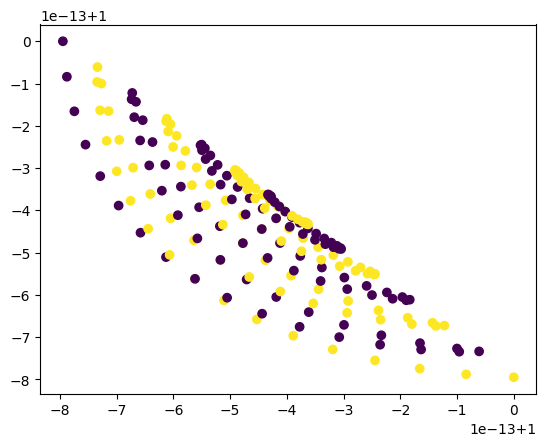

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import time
data = np.loadtxt("spiral.data")
x, y = data[:, :2], data[:, 2]
j = 1/2516582400000



x= kernel(x, x,kernel= RBF, sigma=j)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()